In [1]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *


(array([488., 412., 311., 260., 306., 244., 261., 282., 224., 281.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <BarContainer object of 10 artists>)

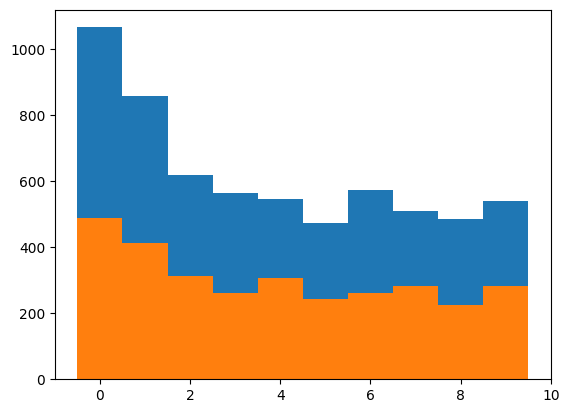

In [2]:
# Chargement des données
data = pkl.load(open("../data/usps.pkl",'rb')) 
# data est un dictionnaire contenant les champs explicites X_train, X_test, Y_train, Y_test
X_train = np.array(data["X_train"],dtype=float) # changement de type pour éviter les problèmes d'affichage
X_test = np.array(data["X_test"],dtype=float)
Y_train = data["Y_train"]
Y_test = data["Y_test"]


# onehot encoding
Y_train_onehot = onehot(Y_train)
Y_test_onehot = onehot(Y_test)
Y_train_onehot = Y_train_onehot.astype(int)

# visualisation de la distribution des étiquettes (dans les 10 classes de chiffres)
plt.figure()
plt.hist(Y_train, np.linspace(-0.5,9.5,11))
plt.hist(Y_test, np.linspace(-0.5,9.5,11))
#plt.savefig("distr_classes.png")

(6229, 256)
(3069, 256) (6229,) (3069,)


Text(0.5, 1.0, 'Image de : 6')

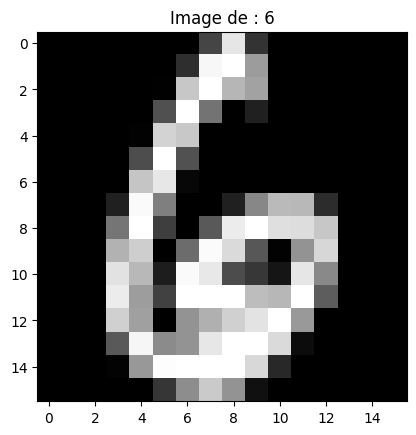

In [3]:
# prise en main des matrices X, Y
print(X_train.shape)
# 6229 images composées de 256 pixels (image = 16x16)
print(X_test.shape,Y_train.shape, Y_test.shape)

# Affichage de l'image 18 de la base de données et récupération de l'étiquette associée:
# (1) remise en forme de la ligne de 256 pixels en 16x16
# (2) affichage avec imshow (en niveaux de gris)
# (3) récupération de l'étiquette dans Y_train

plt.figure()
plt.imshow(X_train[18].reshape(16,16),cmap="gray")
plt.title("Image de : {}".format(Y_train[18]))

In [4]:
value , count = np.unique(Y_train, return_counts=True)

print(value)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
from numpy import cross
from torch import log_softmax


linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
ce_loss = CrossEntropyLoss()

loss_list= []
net = Sequential([linear1, tanh, linear2,softmax])


In [6]:
# Boucle d'entraînement en full batc
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    yhat = net.forward(X_train)

    # Calculer la perte
    loss = ce_loss.forward(Y_train_onehot, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f; Score : %f" % (epoch, loss.mean(), np.mean((np.argmax(yhat,1) ==Y_train))))

    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = ce_loss.backward(Y_train_onehot, yhat)
    delta = net.backward(X_train, delta, gradient_step = 0.1)
np.mean((np.argmax(net.forward(X_test),1) ==np.argmax(Y_test_onehot, axis =1)))

Epoch 0: Loss = 0.891757; Score : 0.157971
Epoch 10: Loss = 0.838179; Score : 0.453845
Epoch 20: Loss = 0.756107; Score : 0.481458
Epoch 30: Loss = 0.701143; Score : 0.550329
Epoch 40: Loss = 0.660646; Score : 0.619522
Epoch 50: Loss = 0.625805; Score : 0.669449
Epoch 60: Loss = 0.594740; Score : 0.704768
Epoch 70: Loss = 0.566933; Score : 0.732381
Epoch 80: Loss = 0.542113; Score : 0.751485
Epoch 90: Loss = 0.519858; Score : 0.768823
Epoch 100: Loss = 0.499548; Score : 0.790175
Epoch 110: Loss = 0.480464; Score : 0.817948
Epoch 120: Loss = 0.462399; Score : 0.843314
Epoch 130: Loss = 0.445614; Score : 0.856959
Epoch 140: Loss = 0.430159; Score : 0.864505
Epoch 150: Loss = 0.416028; Score : 0.869160
Epoch 160: Loss = 0.403127; Score : 0.874779
Epoch 170: Loss = 0.391324; Score : 0.876866
Epoch 180: Loss = 0.380491; Score : 0.880398
Epoch 190: Loss = 0.370515; Score : 0.883930
Epoch 200: Loss = 0.361300; Score : 0.885856
Epoch 210: Loss = 0.352760; Score : 0.887783
Epoch 220: Loss = 0.3

KeyboardInterrupt: 

[0.9121260192904179, 0.9102490916154857, 0.9082795935818835, 0.9061936641617683, 0.903966755967374, 0.9015722571909399, 0.898980277968045, 0.8961565215931391, 0.8930612424432692, 0.8896483849834599, 0.885865126782946, 0.8816522335287857, 0.8769458793178311, 0.871681844262566, 0.8658031137840103, 0.8592715290698623, 0.8520827960561628, 0.844281618065414, 0.835970825038861, 0.8273076108260198, 0.8184839880560724, 0.8096964476068326, 0.8011159115899765, 0.7928681950737753, 0.7850285840301185, 0.7776275777255736, 0.7706621615142927, 0.7641077866874749, 0.7579283599546975, 0.7520833944489573, 0.7465325403487474, 0.7412381176820542, 0.7361662994795255, 0.7312874657841196, 0.72657609383358, 0.7220104187819069, 0.7175720047375708, 0.7132453035386811, 0.7090172401704915, 0.7048768412514637, 0.7008149106816063, 0.6968237503431152, 0.6928969210832154, 0.6890290384925711, 0.6852155982593687, 0.6814528265699467, 0.6777375518290133, 0.6740670947229741, 0.6704391742751205, 0.6668518280203808, 0.66330

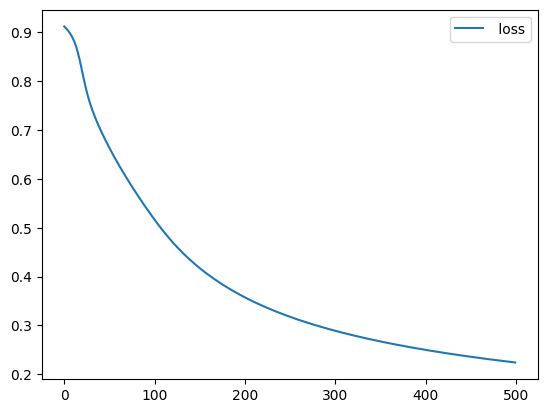

In [ ]:
print(loss_list)
plt.plot(loss_list,label =' loss')
plt.legend()
plt.show()

In [ ]:
linear1 = Linear(256, 128)
tanh = TanH()
softmax = Softmax()
log_softmax= LogSoftmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
ce_loss = CrossEntropyLoss()

loss_list= []
net1 = Sequential([linear1, tanh, linear2,softmax])

In [ ]:
Lerror, Lscore= SGD(net1, ce_loss, X_train, Y_train_onehot, predict= lambda x : np.argmax(net1.forward(x),axis = 1), xtest = X_test, ytest = np.argmax(Y_test_onehot,axis =1), batch_size=10, max_iter=100, eps =0.1)


Iteration: 0 / 100
score  0.905

Iteration: 1 / 100
score  0.926

Iteration: 2 / 100
score  0.932

Iteration: 3 / 100
score  0.938

Iteration: 4 / 100
score  0.94

Iteration: 5 / 100
score  0.941

Iteration: 6 / 100
score  0.946

Iteration: 7 / 100
score  0.949

Iteration: 8 / 100
score  0.948

Iteration: 9 / 100
score  0.949

Iteration: 10 / 100
score  0.948

Iteration: 11 / 100
score  0.952

Iteration: 12 / 100
score  0.953

Iteration: 13 / 100
score  0.953

Iteration: 14 / 100
score  0.953

Iteration: 15 / 100
score  0.955

Iteration: 16 / 100
score  0.957

Iteration: 17 / 100
score  0.955

Iteration: 18 / 100
score  0.954

Iteration: 19 / 100
score  0.957

Iteration: 20 / 100
score  0.957

Iteration: 21 / 100
score  0.958

Iteration: 22 / 100
score  0.956

Iteration: 23 / 100
score  0.958

Iteration: 24 / 100
score  0.959

Iteration: 25 / 100
score  0.956

Iteration: 26 / 100
score  0.957

Iteration: 27 / 100
score  0.958

Iteration: 28 / 100
score  0.959

Iteration: 29 / 100
score

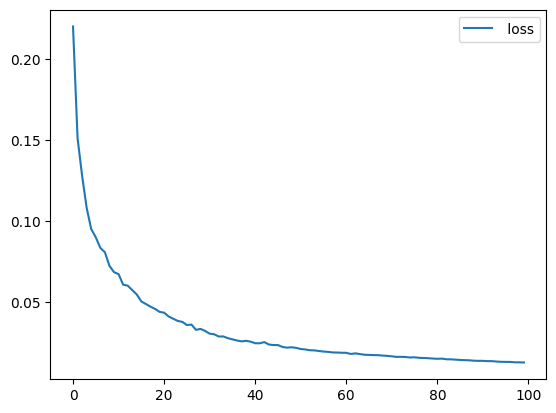

In [ ]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()


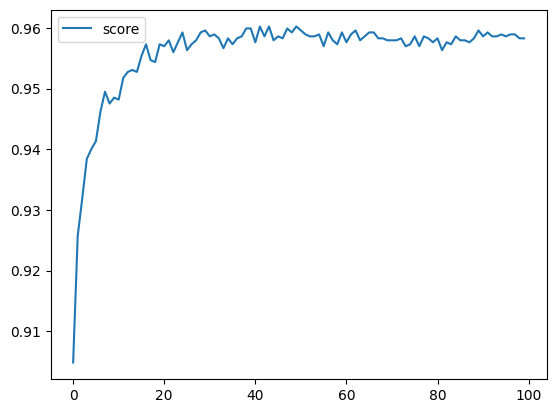

In [ ]:
plt.plot(Lscore, label = 'score')
plt.legend()
plt.show()

In [ ]:
from cv2 import log


linear1 = Linear(256, 128)
tanh = TanH()
logce_loss= LogSoftmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)


loss_list= []
net2 = Sequential([linear1, tanh, linear2,sigmoid])

In [ ]:
Lerror, Lscore= SGD(net2, logce_loss, X_train, Y_train_onehot, predict= lambda x : np.argmax(net2.forward(x),axis = 1), xtest = X_test, ytest = np.argmax(Y_test_onehot,axis =1), batch_size=10, max_iter=100, eps =0.1)


Iteration: 0 / 100
score  0.773

Iteration: 1 / 100
score  0.827

Iteration: 2 / 100
score  0.855

Iteration: 3 / 100
score  0.865

Iteration: 4 / 100
score  0.876

Iteration: 5 / 100
score  0.885

Iteration: 6 / 100
score  0.887

Iteration: 7 / 100
score  0.89

Iteration: 8 / 100
score  0.895

Iteration: 9 / 100
score  0.898

Iteration: 10 / 100
score  0.904

Iteration: 11 / 100
score  0.905

Iteration: 12 / 100
score  0.908

Iteration: 13 / 100
score  0.91

Iteration: 14 / 100
score  0.911

Iteration: 15 / 100
score  0.913

Iteration: 16 / 100
score  0.913

Iteration: 17 / 100
score  0.915

Iteration: 18 / 100
score  0.916

Iteration: 19 / 100
score  0.918

Iteration: 20 / 100
score  0.918

Iteration: 21 / 100
score  0.919

Iteration: 22 / 100
score  0.92

Iteration: 23 / 100
score  0.92

Iteration: 24 / 100
score  0.921

Iteration: 25 / 100
score  0.922

Iteration: 26 / 100
score  0.922

Iteration: 27 / 100
score  0.922

Iteration: 28 / 100
score  0.925

Iteration: 29 / 100
score  0

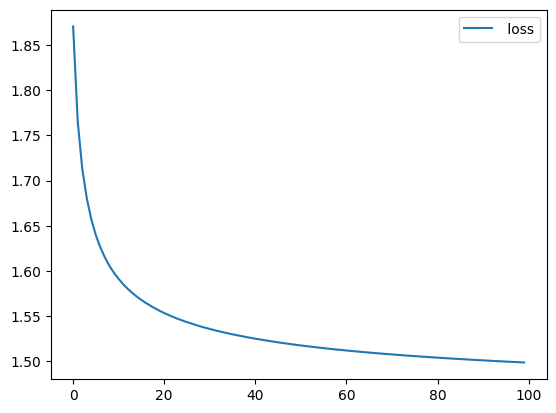

In [ ]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()

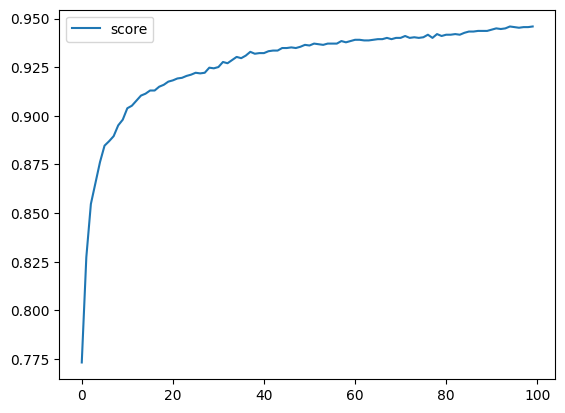

In [ ]:
plt.plot(Lscore, label = 'score')
plt.legend()
plt.show()